# EDA

##### Import libraries

In [27]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import datetime
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

##### Load data

In [2]:
posts = pd.read_csv('../data/posts-preprocessed.csv') 

In [9]:
posts = posts.drop_duplicates(subset='text', keep="first")

In [15]:
# drop duplicates didn't seem to work in webscrape notebook, so will save again here:
posts.to_csv('../data/posts-preprocessed.csv')

In [10]:
posts.head()

,author,subreddit,timeframe,text,datetime,words,word_stems,text_length,text_word_count
0,sub17967,bulimia,pre-covid,['how can i stop hating myself i have been on...,2017-12-02 16:36:16,"['[', ""'how"", 'stop', 'hating', 'eating', 'dis...","['[', ""'how"", 'stop', 'hating', 'eating', 'dis...",12393,2393
1,sub10311,bulimia,pre-covid,['new guy here 1 month on it 16m hi guys just...,2017-12-05 19:45:25,"['[', ""'new"", 'guy', '1', 'month', '16m', 'hi'...","['[', ""'new"", 'guy', '1', 'month', '16m', 'hi'...",11555,2299
2,sub5587,bulimia,pre-covid,['so i just vomited blood what can i eat while...,2017-12-06 16:58:16,"['[', ""'so"", 'vomited', 'blood', 'eat', 'throa...","['[', ""'so"", 'vomited', 'blood', 'eat', 'throa...",10462,2009
3,sub32498,bulimia,pre-covid,['recovery is expensive during recovery hi i...,2017-12-07 14:07:27,"['[', ""'recovery"", 'expensive', 'recovery', 'h...","['[', ""'recovery"", 'expensive', 'recovery', 'h...",5841,1102
4,sub35262,bulimia,pre-covid,['anyone relate wanting validation for small s...,2017-12-08 00:49:23,"['[', ""'anyone"", 'relate', 'wanting', 'validat...","['[', ""'anyone"", 'relate', 'wanting', 'validat...",16310,3115


### Submission Lengths

In [11]:
# Create a new column with submission length
posts['text_length'] = posts['text'].map(len)

In [12]:
# Create a new column with number of words per submission
posts['text_word_count'] = posts['text'].map(lambda x: len(x.split()))

In [13]:
# Show the shortest submissions 
posts.sort_values(by='text_word_count', ascending=True)[['text']].head()

,text
8495,['anyone else feels like bulimia is a sort of ...
6725,['adults with bulimia how do you see this diso...
12060,['kidneys has anyone else had problems with t...
15676,['an auditcurbing the urge to purge now i was...
25334,['kinda graphic plus a question so i just had...


In [14]:
# Show the longest submissions
posts.sort_values(by='text_word_count', ascending=False)[['text']].head()

,text
7651,['my girlfriend and i my girlfriend is such a...
2770,['i had an episode today today i received a c...
2273,['how do you stay better hey\n\ni have been s...
15356,['eating disorder survey for research chance t...
326,['i need help hello my fellow humans i have a...


# Distribution of submission lengths

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


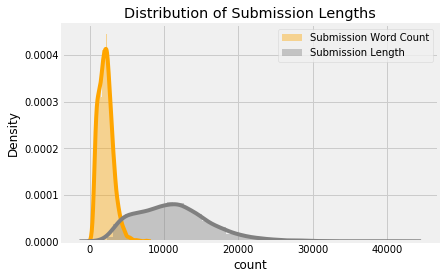

In [16]:
sns.distplot(posts['text_word_count'] , color = 'orange', label="Submission Word Count",bins=50)
sns.distplot(posts['text_length'] , color = 'grey', label="Submission Length", bins=50)
plt.xlabel("count")
plt.title("Distribution of Submission Lengths")
plt.legend();

In [ ]:
# To do: look at pre and post covid and by disorder

## Unique users

In [17]:
# Find number of unique users for combined dataset.
posts['author'].describe()

count         3876
unique        3180
top       sub17507
freq            22
Name: author, dtype: object

In [19]:
# Look at number of submissions per user.
posts['author'].value_counts().head(20)

sub17507    22
sub33605    21
sub11379    12
sub7076     11
sub27073    11
sub12193    10
sub17688    10
sub17689     9
sub17765     8
sub26259     8
sub18017     8
sub35946     8
sub11222     8
sub22394     8
sub7321      8
sub28223     8
sub30958     7
sub19999     6
sub16363     6
sub22438     6
Name: author, dtype: int64

## Plot most frequently used words

In [28]:
# create the transform
vectorizer = TfidfVectorizer()

In [29]:
text = posts['words']

In [30]:
vectors = vectorizer.fit_transform(text)

In [31]:
feature_names = vectorizer.get_feature_names()


In [32]:
dense = vectors.todense()


In [33]:
denselist = dense.tolist()


In [34]:
df = pd.DataFrame(denselist, columns=feature_names)


In [35]:
df.sum(axis=0).sort_values(ascending=False).head(15)


im        670.078591
like      446.788335
dont      360.962577
feel      351.842915
know      283.585143
ive       255.871791
get       243.304893
want      223.464830
really    216.552309
time      200.636182
ni        190.899168
even      181.817493
people    181.132932
cant      176.886926
would     159.189196
dtype: float64

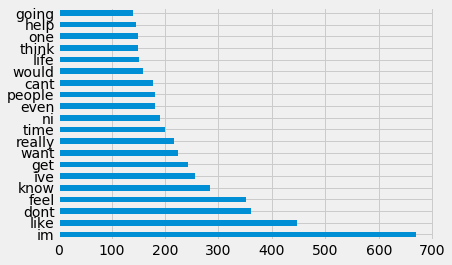

In [37]:
df.sum().sort_values(ascending=False).head(20).plot(kind='barh');


In [ ]:
# Go back and check stop words, to be sure it worked, 
# Also, waht is 'ni'??... 